# Modification of dataset structure in order to use FADN codes for sheet "FICHA_B

In [1]:
import pandas as pd
import os
import random

In [2]:
# Path and file name
path = r"C:\Users\IDENER-Matlab1\Desktop\AGRICORE\SharePoint\OneDrive_2021-02-16\Microdatos para OTE370"
file_name = "book.xlsx"

# Reading microdata sheet "Ficha_B"
table_B = pd.read_excel(os.path.join(path, file_name), sheet_name="Ficha_B")

In [3]:
table_B.head(5)

Ejercicio  Explotacion  Categoria  S.A.U.
0       2015        55284         30       0
1       2014        55284         30       0
2       2015        55284         20       0
3       2014        55284         10    1993
4       2014        55284         20       0

In [4]:
table_B.columns

Index(['Ejercicio', 'Explotacion', 'Categoria', 'S.A.U.'], dtype='object')

**Ejercicio:** year to which the financial year relates.  
**Explotacion:** explotation identifier code.  
**Categoria:** three different possible values, 10, 20, 30.  
**S.A.U.:** utilised agricultural surface.  

The objective is to convert the table from these columns to the columns specified in *"Farmer_model.pdf"/Table11:B TYPE OF OCCUPATION*. These are:

**B_UO_10_A:** Land of which the farmer is the owner, lifelong tenant or leaseholder.  
**B_UT_20_A:** Land not belonging to the holding (that means, not satisfaying the conditions os owner-occupation in UO), for which fixed rent is paid in cash or kind.  
**B_US_30_A:** Land farmed jointly by the granator and the sharecropper on the basis of a sharecropping agreement, or under similar terms.  

The conversion betweeen them is carried out by the column "Categorias" since it related its code with the new column names. For each new column, it will be assigned the value contained in "S.A.U." of the las data structure.

In [5]:
# Selecting random exploitation
expl = table_B["Explotacion"][random.randint(0, table_B["Explotacion"].shape[0])]

In [6]:
# All years availables for the selected agricultural exploitation
print(table_B[table_B["Explotacion"] == expl].Ejercicio.unique().sort())

for y in table_B[table_B["Explotacion"] == expl].Ejercicio.unique():
    print(print(table_B[(table_B["Explotacion"] == expl) & (table_B["Ejercicio"] == y)]))

None
      Ejercicio  Explotacion  Categoria  S.A.U.
4209       2014        89955         10    5500
4210       2014        89955         20       0
4211       2014        89955         30       0
None
      Ejercicio  Explotacion  Categoria  S.A.U.
4212       2016        89955         10    5500
4213       2016        89955         20       0
4214       2016        89955         30       0
None
      Ejercicio  Explotacion  Categoria  S.A.U.
4215       2015        89955         10    5500
4216       2015        89955         20       0
4217       2015        89955         30       0
None
      Ejercicio  Explotacion  Categoria  S.A.U.
4218       2017        89955         10    5500
4219       2017        89955         20       0
4220       2017        89955         30       0
None
      Ejercicio  Explotacion  Categoria  S.A.U.
4221       2018        89955         10    5500
4222       2018        89955         20       0
4223       2018        89955         30       0
None


The activity of this agricultural exploitation has finished in the year 2017, possibly due to retirement.

The new dataframe will have the following columns:

In [7]:
years = sorted(table_B["Ejercicio"].unique())
print(years)

[2014, 2015, 2016, 2017, 2018]


In [37]:
# Extraction of all the agricultural exploitations registered in "Ficha_B"
exploitations = sorted(table_B["Explotacion"].unique())

# Extraction of all the activity years regitered in "Ficha_B"
years = sorted(table_B["Ejercicio"].unique())

# Extraction of all the categories registered in "Ficha_B"
categories = sorted(table_B["Categoria"].unique())

In [38]:
# Columns names used in the new dataframe, ordered by FDN codes
column_names = ["Ejercicio", "Explotacion", "B_UO_10_A", "B_UT_20_A", "B_US_30_A"]

# Building new data frame
DF = pd.DataFrame(columns=column_names)

# Enable to create a reduced dataframe in which the years with no activity will not appear
reduced = True

# Loop exploitations
for expl in exploitations:
    # Loop all available years
    for y in years:
        
        # Cell selection for the combination of "Explotacion" and "Ejercicio" for all the categories
        B_UO_10_A = table_B[(table_B["Explotacion"] == expl) & (table_B["Ejercicio"] == y) & (table_B["Categoria"] == 10)]["S.A.U."]
        B_UT_20_A = table_B[(table_B["Explotacion"] == expl) & (table_B["Ejercicio"] == y) & (table_B["Categoria"] == 20)]["S.A.U."]
        B_US_30_A = table_B[(table_B["Explotacion"] == expl) & (table_B["Ejercicio"] == y) & (table_B["Categoria"] == 30)]["S.A.U."]
        
        # Checking if any of the cells is null
        # If it is null, it assigns None
        # If it is not null, it assigns the cell value
        if B_UO_10_A.isnull().all():
            B_UO = None
        else:
            B_UO = B_UO_10_A.item()
            
        if B_UT_20_A.isnull().all():
            B_UT = None
        else:
            B_UT = B_UT_20_A.item()
        
        if B_US_30_A.isnull().all():
            B_US = None
        else:
            B_US = B_US_30_A.item()

        if reduced:
            # If the exploitation has data for any category in a year
            # Noramlly, in this case none null cell will appear
            if not ((B_UO == None) and (B_UT == None) and (B_US == None)):
                # Building row dataframe
                df_i = pd.DataFrame(data = [[y, expl, B_UO, B_UT, B_US]], columns=column_names)

                DF = pd.concat([DF, df_i])
            else:
                pass
        else:
            # Building row dataframe
            df_i = pd.DataFrame(data = [[y, expl, B_UO, B_UT, B_US]], columns=column_names)

            DF = pd.concat([DF, df_i])

In [39]:
print(DF)

   Ejercicio Explotacion B_UO_10_A B_UT_20_A B_US_30_A
0       2014       55284      1993         0         0
0       2015       55284      1993         0         0
0       2014       55290      2339         0         0
0       2015       55290      2339         0         0
0       2016       55290      2339         0         0
..       ...         ...       ...       ...       ...
0       2018       92886         0      1750         0
0       2018       92887         0      1750         0
0       2018       92888         0      1300         0
0       2018       92889         0      1700         0
0       2018       92890         0      1700         0

[1762 rows x 5 columns]


In [40]:
# Saving new dataframe
DF.to_csv("table_B_sorted_reduced.csv", index=False)

# Constructing possible useful variables for agents
Agents agromanagement decisions module contemplates the variation in the possible area usage:  
* *Buy land*. When an agent participates in the land market and it acquires a new plot of land for its property. It is reflected in a positive difference between two successive years for one holding in the variable ***B_UO_10_A***.  
  
  
* *Sell land*. It is possible that due to a poor resolution of past financial years the agent is forced to sacrifice part of its assets in the form of a parcel of land in order to have liquidity. It is also possible that when an agent who retires and has no descendants wants to sell his plots of land. It is reflected in a negative difference between two sucessive years for one holding in the variable ***B_UO_10_A***.  
  
  
* *Rent land*. It is possible that when an agent who retires and has no descendants wants to rent his plots of land. Since that when an agent is retired it does not appear anymore in the FADN data, it is not possible to know if an agent sold or rents its lands. From a modelling point of view, the land of the retired holder will pass to the land market, but the agent will go out from the simulation scenario.  
The case in which an agent is not retired yet and it rents its lands is less probable but possible. This case may be reflected in the FADN data when an agent does not vary its surface in possession but the total worked surface do. For calculating rented land area would be necessary to compare table B data with the table I data. Comparing both tables, it is demonstrated that the surface of some holdings for a certain accountancy year of the table I do not match the surface of the same holding including ownership, rented or sharecropped of the same holding in the same accountancy year. Table B has some exceptions in the surface register as:  
    * It does not register the land area on which the harvest is bought as a standing crop. No area is recorded for those., only the sums paid for the purchase of standing crops are to be registered in table H. 
    * It does not register the land area rented in for less than one year on an occasional basis except it is renewed annually.  
    
It exists the possibility that the holding realizes more than one harvest in the same year in some parcels.  

The three above mentioned reasons impede obtaining the surface of rented land because it is not possible to know the reason for the differences of areas between both tables.
  
  
* *Lease land*. When an agent wants to enlarge its exploitation and it has not liquidity enough to buy new land, it can participate in the lease market to acquire a new rented surface. It may also be the case that an agent wants to enlarge its worked land and even having liquidity, it is not available land to buy in the market. An agent leases land when the difference between two sucessive years in the variable ***B_UT_20_A*** is positive.  



In [41]:
def _rnd_exp(df):
    
    return random.sample(list(df["Explotacion"].unique()), 1)[0]

In [42]:
DF[DF["Explotacion"]==_rnd_exp(DF)]

Ejercicio Explotacion B_UO_10_A B_UT_20_A B_US_30_A
0      2014       90372         0      2200         0
0      2015       90372         0      2200         0
0      2016       90372         0      2200         0
0      2017       90372         0      2200         0
0      2018       90372         0      2200         0

In [43]:
DF[DF["Explotacion"]==_rnd_exp(DF[DF["B_UO_10_A"]>0])]

Ejercicio Explotacion B_UO_10_A B_UT_20_A B_US_30_A
0      2014       86616      1200      1500         0
0      2015       86616      1200      1500         0
0      2016       86616      1200      1500         0
0      2017       86616      1200      1500         0
0      2018       86616      1200      1500         0

In [44]:
DF = DF.reset_index(drop=True)

In [45]:
# Creating new columns

# Column to register the increase in the ownership surface area (BUY LAND)
DF["B_UO_10_I"] = [0]*len(DF.index)

# Column to register the decrease in the ownership surface area (SELL LAND)
DF["B_UO_10_D"] = [0]*len(DF.index)

# Column to register the increase in the leased surface area ()
DF["B_UT_20_I"] = [0]*len(DF.index)


Only these three variables were generated because they correspond to the three possible actions taken by an active agent:  
* Buy land, B_UO_10_I
* Sell land, B_UO_10_D
* Lease landm B_UT_20_I

In [46]:
DF

Ejercicio Explotacion B_UO_10_A B_UT_20_A B_US_30_A  B_UO_10_I  \
0         2014       55284      1993         0         0          0   
1         2015       55284      1993         0         0          0   
2         2014       55290      2339         0         0          0   
3         2015       55290      2339         0         0          0   
4         2016       55290      2339         0         0          0   
...        ...         ...       ...       ...       ...        ...   
1757      2018       92886         0      1750         0          0   
1758      2018       92887         0      1750         0          0   
1759      2018       92888         0      1300         0          0   
1760      2018       92889         0      1700         0          0   
1761      2018       92890         0      1700         0          0   

      B_UO_10_D  B_UT_20_I  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
...         ...        ...  
1757          0          0  
1758          0          0  
1759          0          0  
1760          0          0  
1761          0          0  

[1762 rows x 8 columns]

In [47]:
#for y in DF["Ejercicio"].unique():
for exp in DF["Explotacion"].unique():
    
    sub_df = DF[DF["Explotacion"]==exp]
    
    for i in sub_df.index:
        
        if i != sorted(list(sub_df.index))[-1]:
            diff = sub_df.loc[i+1] - sub_df.loc[i]
            
            # Difference in ownership
            diff_ownership = diff["B_UO_10_A"]
            
            # Difference in rented area
            diff_rented = diff["B_UT_20_A"]
            
            # Difference in sharecropped area
            diff_sharecrop = diff["B_US_30_A"]

            # Buy land
            if diff_ownership > 0:                
                DF.at[i, "B_UO_10_I"] = diff_ownership
            
            # Sell land
            if diff_ownership < 0:
                DF.at[i, "B_UO_10_D"] = abs(diff_ownership)
                
            # Rent land, increase
            if diff_rented > 0:
                DF.at[i, "B_UT_20_I"] = diff_rented
                
            # Rent land, decrease
            if diff_rented < 0:
                DF.at[i, "B_UT_20_D"] = diff_rented
            
            # Increasing sharecropped area
            #if diff_sharecrop > 0:
            #    print("sharecrop increased: {}".format(diff_sharecrop))
            #if diff_sharecrop < 0:
            #    print("sharecrop reduced: {}".format(diff_sharecrop))
            

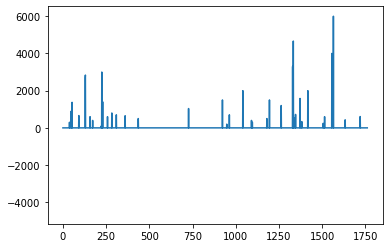

In [48]:
import matplotlib.pyplot as plt
plt.plot(DF["B_UT_20_I"])
plt.plot(DF["B_UT_20_D"])
plt.show()

In [52]:
# Saving table B in FADN format with new variables created
DF.to_csv("table_B_agent.csv", index=False)

In [56]:
table_I = pd.read_csv("table_I.csv")

In [57]:
table_I

Explotacion  Ejercicio  I_A_10110_TC_MD_TA  I_A_10110_TC_MD_IR  \
0           55284       2014                 NaN                 NaN   
1           55284       2015                 NaN                 NaN   
2           55290       2014                 NaN                 NaN   
3           55290       2015                 NaN                 NaN   
4           55290       2016                 NaN                 NaN   
...           ...        ...                 ...                 ...   
1757        92886       2018                 NaN                 NaN   
1758        92887       2018                 NaN                 NaN   
1759        92888       2018                 NaN                 NaN   
1760        92889       2018                 NaN                 NaN   
1761        92890       2018                 NaN                 NaN   

      I_A_10110_TC_MD_EN  I_A_10110_TC_MD_GM  I_OV_10110_TC_MD_V  \
0                    NaN                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
1757                 NaN                 NaN                 NaN   
1758                 NaN                 NaN                 NaN   
1759                 NaN                 NaN                 NaN   
1760                 NaN                 NaN                 NaN   
1761                 NaN                 NaN                 NaN   

      I_CV_10110_TC_MD_V  I_PR_10110_TC_MD_Q  I_SA_10110_TC_MD_Q  ...  \
0                    NaN                 NaN                 NaN  ...   
1                    NaN                 NaN                 NaN  ...   
2                    NaN                 NaN                 NaN  ...   
3                    NaN                 NaN                 NaN  ...   
4                    NaN                 NaN                 NaN  ...   
...                  ...                 ...                 ...  ...   
1757                 NaN                 NaN                 NaN  ...   
1758                 NaN                 NaN                 NaN  ...   
1759                 NaN                 NaN                 NaN  ...   
1760                 NaN                 NaN                 NaN  ...   
1761                 NaN                 NaN                 NaN  ...   

      I_FU_90330_TC_MD_V  I_A_90900_TC_MD_TA  I_A_90900_TC_MD_IR  \
0                    NaN                 0.0                 0.0   
1                    NaN                 0.0                 0.0   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
1757                 NaN                 NaN                 NaN   
1758                 NaN                 NaN                 NaN   
1759                 NaN                 NaN                 NaN   
1760                 NaN                 NaN                 NaN   
1761                 NaN                 NaN                 NaN   

      I_A_90900_TC_MD_EN  I_A_90900_TC_MD_GM  I_OV_90900_TC_MD_V  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    NaN                 NaN                 NaN   
3                    NaN                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
1757                 NaN                 NaN                 NaN   
1758                 NaN                 NaN                 NaN   
1759              

In [59]:
current = 0.35
voltage = 5
power = current*voltage
print(power)

1.75


In [60]:
time_h = 24
energy_day = power*time_h
print(energy_day, "Wh")

42.0 Wh


In [61]:
# Batery
voltage_b = 12 # V
current_b = 12 # Ah
energy_b = voltage_b*current_b
print(energy_b, "Wh")

144 Wh


In [63]:
1.75/12

0.14583333333333334

In [62]:
print("autonomia = {}".format(energy_b/energy_day))

autonomia = 3.4285714285714284


In [76]:
DF

Ejercicio Explotacion B_UO_10_A B_UT_20_A B_US_30_A
0         2014       55284      1993         0         0
1         2015       55284      1993         0         0
2         2014       55290      2339         0         0
3         2015       55290      2339         0         0
4         2016       55290      2339         0         0
...        ...         ...       ...       ...       ...
1757      2018       92886         0      1750         0
1758      2018       92887         0      1750         0
1759      2018       92888         0      1300         0
1760      2018       92889         0      1700         0
1761      2018       92890         0      1700         0

[1762 rows x 5 columns]

In [92]:
a = 0

for exp in sorted(list(table_I["Explotacion"].unique())):
    for y in sorted(list(table_I["Ejercicio"].unique())):
        
        print(exp, y, table_I[(table_I["Explotacion"]==exp)&(table_I["Ejercicio"]==y)][[col for col in table_I.columns if col.endswith("_TA")]].sum().sum())
        #print(DF[(DF["Explotacion"]==exp)&(DF["Ejercicio"]==y)][[col for col in DF.columns if col not in ["Ejercicio", "Explotacion"]]])
        print("")
        
        a += 1

        if a > 10:
            break
    if a > 10:
        break

55284 2014 3130.0

55284 2015 3130.0

55284 2016 0.0

55284 2017 0.0

55284 2018 0.0

55290 2014 4833.0

55290 2015 4833.0

55290 2016 4833.0

55290 2017 4833.0

55290 2018 4833.0

55292 2014 5977.0



In [81]:
# Path and file name
path = r"C:\Users\IDENER-Matlab1\Desktop\AGRICORE\SharePoint\OneDrive_2021-02-16\Microdatos para OTE370"
file_name = "book.xlsx"

# Reading microdata sheet "Ficha_B"
table_I_raw = pd.read_excel(os.path.join(path, file_name), sheet_name="Ficha_I")

In [82]:
table_I_raw[(table_I_raw["Ejercicio"]==2014)&(table_I_raw["Explotacion"]==55284)]

Ejercicio  Explotacion  Categoria  Tc  Md  Superf. Tot.  Superf. Reg.  \
0       2014        55284      40130   1   0           549           109   
1       2014        55284      40320   1   0          1444           444   
2       2014        55284      50200   0   0           549             0   
6       2014        55284      50210   0   0           549             0   
8       2014        55284      50900   0   0            39             0   
9       2014        55284      90900   0   4             0             0   

   Superf. Energ.  Superf. Omg.  Invent. Inic.  Invent. Fin  Produc. Cant.  \
0               0             0              0            0             15   
1               0             0              0            0            200   
2               0             0              0            0              0   
6               0             0              0            0              0   
8               0             0              0            0              0   
9               0             0              0            0              0   

   Ventas Cant.  Ventas Euros  Autoconsumo  Reempleo  
0            15          1963            0         0  
1           200          9774            0         0  
2             0             0            0         0  
6             0             0            0         0  
8             0             0            0         0  
9             0          1166            0         0

In [113]:
table_I_raw[(table_I_raw["Ejercicio"]==2014)&(table_I_raw["Explotacion"]==55284)]["Superf. Tot."].sum()

3130

# Table I

In [126]:
a = 0

for exp in sorted(list(table_I["Explotacion"].unique())):
    for y in sorted(list(table_I["Ejercicio"].unique())):
        
        fadn = table_I[(table_I["Explotacion"]==exp)&(table_I["Ejercicio"]==y)][[col for col in table_I.columns if col.endswith("_TA")]].sum().sum()
        raw = table_I_raw[(table_I_raw["Explotacion"]==exp)&(table_I_raw["Ejercicio"]==y)]["Superf. Tot."].sum()
        
        if fadn != raw:
            print(exp, y)
            print(fadn, raw)


# Table B

In [127]:
a = 0

for exp in sorted(list(table_B["Explotacion"].unique())):
    for y in sorted(list(table_B["Ejercicio"].unique())):
        
        raw = table_B[(table_B["Explotacion"]==exp)&(table_B["Ejercicio"]==y)]["S.A.U."].sum()
        fadn = DF[(DF["Explotacion"]==exp)&(DF["Ejercicio"]==y)][[col for col in DF.columns if col not in ["Ejercicio", "Explotacion"]]].sum().sum()
        
        if raw != fadn:
            print(exp, y)
            print(fadn, raw)
        

# I&B

In [132]:
a = 0

for exp in sorted(list(table_I["Explotacion"].unique())):
    for y in sorted(list(table_I["Ejercicio"].unique())):
        
        fadn_i = table_I[(table_I["Explotacion"]==exp)&(table_I["Ejercicio"]==y)][[col for col in table_I.columns if col.endswith("_TA")]].sum().sum()
        fadn_b = DF[(DF["Explotacion"]==exp)&(DF["Ejercicio"]==y)][[col for col in DF.columns if col not in ["Ejercicio", "Explotacion"]]].sum().sum()
        
        if fadn_i == fadn_b:
            #print(exp, y, "=")
            #print(fadn_b, fadn_i)
            #print(" ")
            pass
        
        if fadn_i != fadn_b:
            print(exp, y, "!=")
            print(fadn_b, fadn_i)
            print(" ")


55284 2014 !=
1993.0 3130.0
 
55284 2015 !=
1993.0 3130.0
 
55290 2014 !=
2339.0 4833.0
 
55290 2015 !=
2339.0 4833.0
 
55290 2016 !=
2339.0 4833.0
 
55290 2017 !=
2339.0 4833.0
 
55290 2018 !=
2339.0 4833.0
 
55292 2014 !=
3939.0 5977.0
 
55292 2015 !=
3939.0 5977.0
 
55292 2016 !=
3939.0 5977.0
 
55292 2017 !=
3939.0 5977.0
 
55306 2014 !=
2528.0 5076.0
 
55306 2015 !=
2528.0 5076.0
 
55365 2014 !=
2721.0 2734.0
 
55366 2014 !=
2725.0 7264.0
 
55366 2015 !=
2725.0 7264.0
 
55367 2014 !=
2523.0 5746.0
 
55367 2015 !=
2523.0 5746.0
 
55367 2016 !=
2523.0 5746.0
 
55367 2017 !=
2523.0 5746.0
 
55367 2018 !=
2523.0 5746.0
 
55375 2014 !=
2028.0 2037.0
 
55502 2014 !=
2852.0 6535.0
 
55502 2015 !=
2852.0 6535.0
 
55730 2014 !=
2304.0 2927.0
 
55730 2015 !=
2304.0 2927.0
 
55834 2014 !=
6000.0 6655.0
 
55834 2015 !=
6030.0 6676.0
 
56155 2014 !=
4600.0 4615.0
 
56155 2015 !=
4900.0 4915.0
 
56155 2016 !=
5020.0 5035.0
 
56155 2017 !=
5000.0 5015.0
 
56160 2016 !=
2114.0 3256.0
 
56160 2017

85718 2015 !=
4300.0 4314.0
 
85718 2016 !=
4300.0 4314.0
 
85718 2017 !=
4300.0 4314.0
 
85718 2018 !=
4300.0 4314.0
 
85791 2014 !=
2425.0 2438.0
 
85791 2015 !=
2425.0 2438.0
 
86488 2014 !=
2300.0 2317.0
 
86488 2015 !=
2300.0 2317.0
 
86488 2016 !=
2300.0 2317.0
 
86488 2017 !=
2300.0 2317.0
 
86488 2018 !=
2300.0 2317.0
 
86490 2014 !=
2800.0 2815.0
 
86490 2015 !=
2800.0 2815.0
 
86490 2016 !=
2800.0 2815.0
 
86490 2017 !=
2800.0 2815.0
 
86490 2018 !=
2800.0 2815.0
 
86491 2014 !=
3100.0 3110.0
 
86491 2015 !=
3100.0 3110.0
 
86491 2016 !=
3100.0 3110.0
 
86491 2017 !=
3100.0 3110.0
 
86491 2018 !=
3100.0 3110.0
 
86493 2014 !=
2700.0 2710.0
 
86493 2015 !=
2700.0 2710.0
 
86493 2016 !=
2700.0 2710.0
 
86493 2017 !=
2700.0 2710.0
 
86493 2018 !=
2700.0 2710.0
 
86496 2014 !=
2900.0 2905.0
 
86496 2015 !=
2900.0 2905.0
 
86496 2016 !=
2900.0 2905.0
 
86496 2017 !=
2900.0 2905.0
 
86496 2018 !=
2900.0 2905.0
 
86497 2014 !=
2500.0 2512.0
 
86497 2015 !=
2500.0 2512.0
 
86497 2016

89803 2015 !=
5200.0 5207.0
 
89805 2014 !=
3500.0 3516.0
 
89805 2015 !=
3600.0 3616.0
 
89805 2016 !=
3600.0 3616.0
 
89805 2017 !=
3600.0 3616.0
 
89805 2018 !=
3600.0 3616.0
 
89806 2014 !=
1451.0 1455.0
 
89806 2015 !=
1451.0 1455.0
 
89806 2016 !=
1451.0 1455.0
 
89806 2017 !=
1451.0 1455.0
 
89806 2018 !=
1451.0 1455.0
 
89807 2014 !=
5000.0 5007.0
 
89807 2015 !=
5000.0 5007.0
 
89807 2016 !=
5000.0 5007.0
 
89807 2017 !=
5000.0 5007.0
 
89807 2018 !=
5000.0 5007.0
 
89808 2014 !=
800.0 806.0
 
89808 2015 !=
1300.0 1306.0
 
89808 2016 !=
1300.0 1306.0
 
89808 2017 !=
1300.0 1306.0
 
89808 2018 !=
1300.0 1306.0
 
89810 2014 !=
6704.0 6716.0
 
89810 2015 !=
6704.0 6716.0
 
89810 2016 !=
6704.0 6716.0
 
89810 2017 !=
6704.0 6716.0
 
89810 2018 !=
6704.0 6716.0
 
89811 2014 !=
4470.0 4474.0
 
89811 2015 !=
5970.0 5974.0
 
89812 2014 !=
3788.0 3792.0
 
89812 2015 !=
3788.0 3792.0
 
89813 2014 !=
5166.0 5172.0
 
89813 2015 !=
5166.0 5172.0
 
89813 2016 !=
5166.0 5172.0
 
89813 2017 !